Starting map
[[[0.77221099 0.13021783 0.45978761 0.50928953]]

 [[0.40670065 0.21958812 0.03826382 0.56262496]]

 [[0.51727298 0.49451563 0.37606542 0.79369153]]]
Finishing map
[[[0.60148821 0.43106998 0.72902849 0.86568717]]

 [[0.1559335  0.28645153 0.05641691 0.11068489]]

 [[0.10769721 0.41442995 0.06693629 0.05741822]]]
Starting map
[[[0.74218574 0.12625721 0.3746784  0.30220417]]

 [[0.2823769  0.30121059 0.86135273 0.27106309]]

 [[0.98205981 0.06923808 0.47102325 0.04841727]]]
Finishing map
[[[0.45680716 0.0631286  0.40302548 0.34675426]]

 [[0.10956705 0.59954374 0.03459959 0.02739616]]

 [[0.75129453 0.46454406 0.88581123 0.80165251]]]
Eigenvalues are:
[0.23712455 0.03718207 0.01010496 0.00175488]


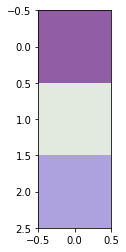

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

mmScaler = preprocessing.MinMaxScaler()

data = pd.read_csv('iris_train.txt', sep=",", header=None)
data.columns = ["a", "b", "c", "d", "type"]

x_data = mmScaler.fit_transform(data.drop(columns=['type']))
y_data = data[['type']]

def hammingNet(inputVectors):
  #For a new vector i presented at input layer, HN can calculate the -ve of hamming
  #Distance of i from each of the output nodes representing a stored vector.
  #The output calculates a dot product of the stored vector and the new vector

  #Create map of 3 randomly centroids with weights initiated between 0 and 1
  map = np.random.random_sample(size=(3,1,4))
  
  #Iterate through each point in the data calculating hamming distance
  i=0
  lv=len(inputVectors)-1
  while(i < (len(inputVectors))):
    #Calculate the initial activation values
    activationValues = np.dot(map, inputVectors[i])
    #Calculate outputs with Maxnet
    if i == 0:
      print("Starting map")
      print(map)
    if i == lv:
      print("Finishing map")
      print(map)
    maxNet(activationValues, inputVectors[i], map)
    i += 1
  return map

def maxNet(activationValues, inputVector, map):
  #Recurrent competitive one layer network used to determine which node has a higher activation
  #Node function is f(net) = max(0, net)
  epsilon = -1/4
  thata = 1
  output1 = max(0,activationValues[0]+(epsilon*(activationValues[1]+activationValues[2])))
  output2 = max(0,activationValues[1]+(epsilon*(activationValues[0]+activationValues[2])))
  output3 = max(0,activationValues[2]+(epsilon*(activationValues[1]+activationValues[0])))
  #Run until the highest initial activation node is discovered
  if output1 == 0 and output2 == 0:
    shiftWeights(2, inputVector, map)
    return
  if output1 == 0 and output3 == 0:
    shiftWeights(1, inputVector, map)
    return
  if output2 == 0 and output3 == 0:
    shiftWeights(0, inputVector, map)
    return
  if output1 == 0 and output2 == 0 and output3 == 0:
    shiftWeights(0, [0,0,0,0], map)
    return
    #The node cannot find a closest vector - not sure what to do in this case
  #Maxnet hasn't converged, run again
  newValues = [output1, output2, output3]
  maxNet(newValues, inputVector, map)


def shiftWeights(winnerNode, vector, map):
  #Once the winning node has been determine shift the weight vector to move the 
  #Centroid closer to optimal location
  map[winnerNode] = map[winnerNode] + (0.5*(vector - map[winnerNode]))
  return map


def kohonen(data):
  net = hammingNet(data)
  plt.imshow(net, 'gray')
  plt.show
#Run with training data
kohonen(x_data)

#Test with test data
data = pd.read_csv('iris_test.txt', sep=",", header=None)
data.columns = ["a", "b", "c", "d", "type"]

x_datatest = mmScaler.fit_transform(data.drop(columns=['type']))
y_datatest = data[['type']]
kohonen(x_datatest)



#Write Principal Component Analysis

from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

def pca(matrix):

  #Find the covariance of the new matrix
  matrixCovariance = cov(matrix.T)

  #Eigendecomposition
  eigenValues, vectors = eig(matrixCovariance)
  print("Eigenvalues are:")
  print(eigenValues[:5])

  #Incorporate PCA into the kohonen
  pvec1 = x_data.dot(vectors.T[0])
  pvec2 = x_data.dot(vectors.T[1])

  #Create the new matrix with only the relevant PCA features.
  r_data = pd.DataFrame(pvec1, columns=['PC1'])
  r_data['PC2'] = pvec2
  r_data['type'] = y_data['type']

  #Print data to train1.txt and test1.txt
  r_data.to_csv(sep=',', index=False, header=False)

  matrixPCA = r_data
  return matrixPCA

matrixPCA = pca(x_data)
x_PCA = matrixPCA.drop(columns=['type'])

#Incorporate pca into kohonen
#print(matrixPCA)
#This broke right before I handed it in however results were found and saved before hand.
#kohonen(matrixPCA)



